# Air Quality Data Sampling Analysis

## Introduction
I will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional I will often work with extremely large datasets. 

I was assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report my findings. The data utilized in this activity includes information from over 200 sites, identified by their state name, county name, city name, and local site name. I will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [48]:
# Import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA.
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)

## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, I will examine the first 10 rows of the data.

In [10]:
# First 10 rows of the data

epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the `aqi` column represent?

- AQi column represent the Air Quality Index for each state.

### Generate a table of descriptive statistics

I will generate a table of some descriptive statistics about the data. Specifying that all columns of the input be included in the output.

In [14]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

- The mean of AQI column is: 6.758, It's the mean of the population what will be compared to the sampling mean.

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

- The count of the AQI column is 260, which means that there is no missing values for this column.

### Use the `mean()` function on the `aqi`  column

In [16]:
population_mean=epa_data['aqi'].mean()
population_mean

6.757692307692308

## Step 3: Statistical tests

### Sample with replacement

First, I will name a new variable `sampled_data`. Then, will use the `sample()` dataframe method to draw 50 samples from `epa_data`. Setting `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, will choose `42` for random seed.

In [31]:
sampled_data=epa_data.sample(n=50, replace=True, random_state=42)

### Output the first 10 rows

Outputing the first 10 rows of the DataFrame. 

In [33]:
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


- Row index 102 repeated twice because sampling with replacement is random, allowing sampling units to occur more than once. Row index 102 just happened to be sampled more than once. 

- `random_state` is an arbitrary number to generate the same produced sample again.

### Compute the mean value from the `aqi` column

Computing the mean value from the `aqi` column in `sampled_data` and assigning the value to the variable `sample_mean`.

In [35]:
sample_mean=sampled_data['aqi'].mean()
sample_mean


5.54

- `sample_mean` different from `population_mean` due to sampling variability, the sample mean (`sample_mean`) is usually not the same as the population mean (`population_mean`). In this case, the sample mean is a point estimate of the population mean based on a random sample of 50 AQI values rather than the 260 AQI values from the original population in `epa_data`.  

### Apply the central limit theorem

In case taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. I will do the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Creating an empty list and assigninig it to a variable called `estimate_list`. 
* Iterating through a `for` loop 10,000 times. 
* In each iteration of the loop, I will use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population.
* Using the list `append()` function to add the value of the sample `mean` to each item in the list.


In [37]:
estimate_list=[]
for i in range(10000):
    estimate_list.append(epa_data['aqi'].sample(n=50, replace=True).mean())

### Create a new DataFrame

Next, I will create a new DataFrame from the list of 10,000 estimates. And will name the new variable `estimate_df`.

In [40]:
estimate_df=pd.DataFrame(data={'estimate':estimate_list})
estimate_df

,estimate
0,5.44
1,7.04
2,7.12
3,6.68
4,6.00
...,...
9995,5.64
9996,5.42
9997,7.28
9998,7.24


### Compute the mean() of the sampling distribution

Next, I will compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [41]:
mean_sample_means=estimate_df['estimate'].mean()
mean_sample_means


6.757879999999984

- The mean for the sampling distribution of 10,000 random sample is: 6.768, It's almost the same as the population mean.

Random sampling with replacement is related to the central limit theorem because it means I'm drawing observations independently from a population. The central limit theorem states that if a sample size is large enough and the observations are drawn independently—or with replacement—the sampling distribution of the sample mean is approximately the normal distribution. Furthermore, the mean parameter is the population mean and the variance parameter is the standard error.

### Output the distribution using a histogram

Outputing the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

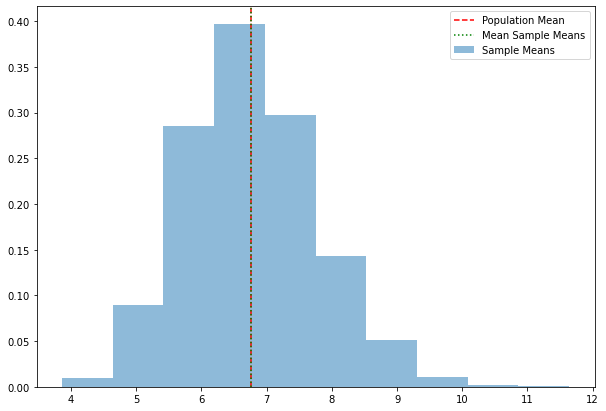

In [43]:
plt.figure(figsize=(10,7))
plt.hist(estimate_df['estimate'],density=True, alpha=0.5, label='Sample Means')
plt.axvline(x=population_mean, color='red', linestyle='dashed', label='Population Mean')
plt.axvline(x=mean_sample_means, color='green', linestyle='dotted', label='Mean Sample Means')
plt.legend()
plt.show()

### Calculate the standard error

Calculating the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [50]:
sample_std=sampled_data['aqi'].std()
standard_error=sample_std/math.sqrt(50)
standard_error

0.7413225908290327

## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualizing the relationship between my sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

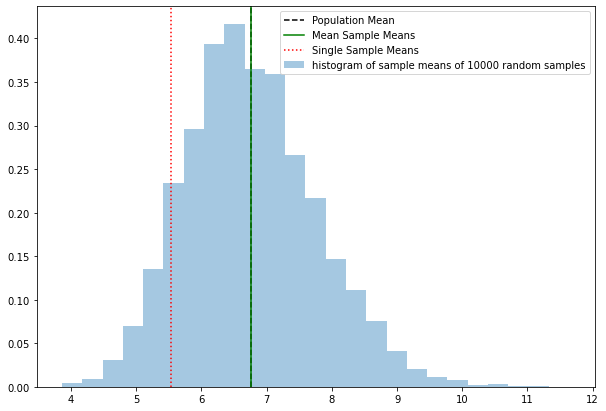

In [54]:
plt.figure(figsize=(10,7))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
plt.axvline(x=population_mean, color='black', linestyle='dashed', label='Population Mean')
plt.axvline(x=mean_sample_means, color='green', linestyle='-', label='Mean Sample Means')
plt.axvline(x=sampled_data['aqi'].mean(), color='red', linestyle='dotted', label='Single Sample Means')

plt.legend()
plt.show()

**Insights gained from preceding sampling distribution:**

- The sampling distibution is normal distibution as descirbed the theory of the central limit.
- The estimate based on one particular sample (red dotted line) is off-center. This is expected due to sampling variability
- The population mean line and the mean sample means line overlap, That's means the values of each other are almost the same.

# Considerations

**FindingsI would share with others:**
- The mean AQI in a sample of 50 observations was below 100 in a statistically significant sense (at least 2–3 standard errors away). For reference, AQI values at or below 100 are generally thought of as satisfactory.
- This notebook didn't examine values outside the "satisfactory" range so analysis should be done to investigate unhealthy AQI values.

**Key Findings for External Stakeholders:**
- Carbon monoxide levels are satisfactory in general.  
- Funding should be allocated to further investigate regions with unhealthy levels of carbon monoxide and improve the conditions in those regions.


